Partie 1 - Pipeline NLP
- Chargement et prétraitement des données
- Vectorisation TF-IDF
- Entraînement du modèle

# 1. Imports

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from utils.text_processing import clean_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Maxim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Maxim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Maxim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# 2. Chargement des données

In [21]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])
display(df.head())
display(df['label'].value_counts())

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


label
ham     4825
spam     747
Name: count, dtype: int64

# 3. Nettoyage des données

In [22]:
df['cleaned'] = df['message'].apply(clean_text)

# 4. Vectorisation TF-IDF

In [23]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['cleaned'])
y = df['label'].map({'ham': 0, 'spam': 1})  # ham = 0, spam = 1

# 5. Split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Entraînement

In [25]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# 7. Prédictions

In [26]:
y_pred = model.predict(X_test)

# 8. Évaluation

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       0.99      0.70      0.82       149

    accuracy                           0.96      1115
   macro avg       0.97      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115



# Matrice de confusion

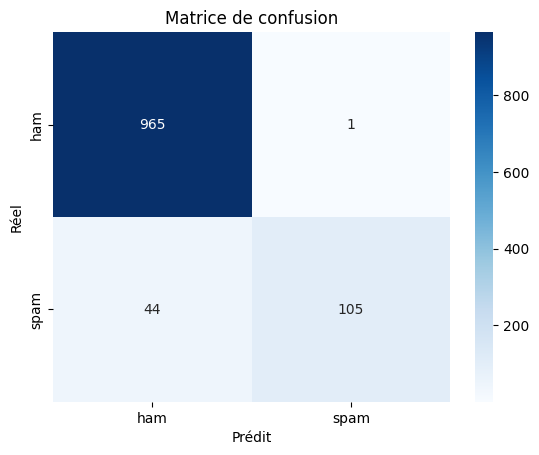

In [28]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['ham','spam'], yticklabels=['ham','spam'])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion")
plt.show()

Partie 2 - Sécurisation
- Chiffrement des données (Fernet)
- Gestion des rôles avec scripts séparés
- Enregistrement et vérification d'intégrité du modèle

# 1. Imports

In [29]:
from cryptography.fernet import Fernet
import pickle
import hashlib

# 2. Génération et sauvegarde d'une clé de chiffrement

In [30]:
key = Fernet.generate_key()
with open("fernet.key", "wb") as f:
    f.write(key)
fernet = Fernet(key)

# 3. Chiffrement d'exemple (on chiffre les 10 premiers messages)

In [31]:
messages_to_encrypt = df['message'][:10].tolist()
encrypted_messages = [fernet.encrypt(m.encode()).decode() for m in messages_to_encrypt]
print("Exemples de messages chiffrés :", encrypted_messages[:2])

Exemples de messages chiffrés : ['gAAAAABn9nWyRKbOYz__Z51-BX4XZb2CmfB4OQq-X-dthjokRbi5HuZNWRmKQdwyEiLhyUFcW5jls6waSPdU6DCU8MyOsJsieYSJov0BSL6wsgic-stZnddcQzNWYCF3-VivcubmFx1ye5LM-T8RRzixSYut7tldGGxsJuKqp2aUnLRM-iFsbmp5ISLT9tGyQoq65dsAgv4IO78LnYC4Whz4hAWN2_oC9w==', 'gAAAAABn9nWyP-dEQPOoPUdcHPK-OT4eK1o8aYZvQnIbwMR9ju5eY3uA3r_2SMM_XyZUJnMmWE0FVmNsUTrpgCx0mEej0xQu4H4amuSh02j49Q9VuIJ03z4=']


# 4. Enregistrement du modèle et du vectorizer

In [32]:
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("tfidf.pkl", "wb") as f:
    pickle.dump(tfidf, f)

# 5. Création du hash du modèle pour vérifier son intégrité

In [33]:
with open("model.pkl", "rb") as f:
    model_data = f.read()
    hash_model = hashlib.sha256(model_data).hexdigest()
    with open("model_hash.txt", "w") as hf:
        hf.write(hash_model)

print("Hash du modèle :", hash_model)

Hash du modèle : 7f2f78428fe26cc32074d8395188b1e53926a3a76372b09acc4bb7278c758d8a


# 6. Vérification d'intégrité (à refaire avant chargement en prod)

In [34]:
with open("model.pkl", "rb") as f:
    data_check = f.read()
    hash_check = hashlib.sha256(data_check).hexdigest()
    print("Modèle intact :", hash_check == hash_model)

Modèle intact : True
